#SEMMA Methodology on the Wine Dataset 🍷

###Introduction to SEMMA Methodology 🌟
In today's data-driven world, making sense of vast amounts of information to derive actionable insights is paramount. The SEMMA methodology provides a structured framework to guide data analysts and scientists through the data mining process. Developed by SAS Institute, SEMMA stands for Sample, Explore, Modify, Model, and Assess, and it outlines the core stages of a data mining project.

In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 33.5 MB/s eta 

#1. Sample 📊
Start by loading the dataset and taking a sample to understand its structure and contents.

The initial step involves selecting a subset of the data, ensuring it's representative of the entire dataset. This is critical because working with a manageable amount of data not only saves computational resources but also allows for quicker iterations. The key is to ensure the sample retains the characteristics of the whole, so findings can be generalized.

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

# Display the first few rows
wine_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#2. Explore 🔍
Let's explore the data by visualizing some key characteristics and distributions.

Once the data is in hand, it's time to dive in and understand its underlying structure and patterns. This involves visualizing the data, calculating descriptive statistics, and identifying any anomalies or outliers. The goal is to develop a comprehensive understanding of the data, which will guide subsequent steps.

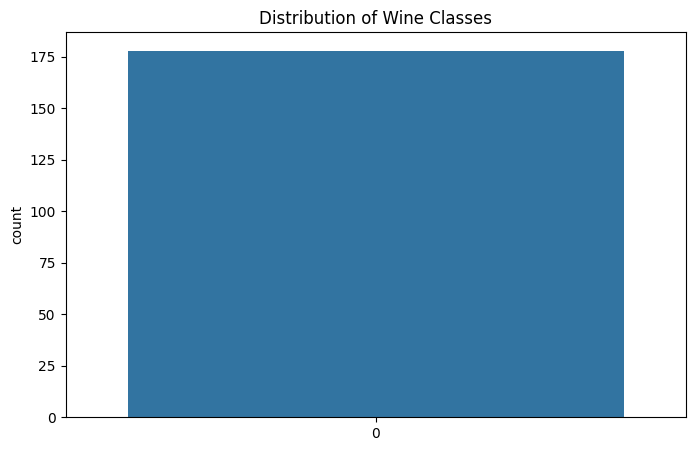

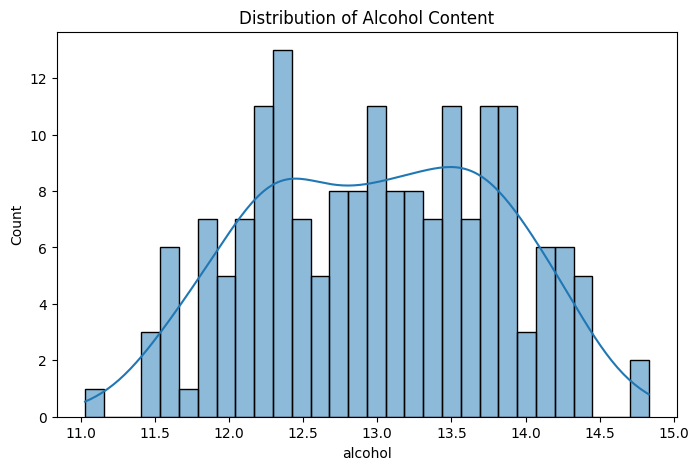

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target classes
plt.figure(figsize=(8, 5))
sns.countplot(wine_df['target'])
plt.title('Distribution of Wine Classes')
plt.show()

# Alcohol content distribution
plt.figure(figsize=(8, 5))
sns.histplot(wine_df['alcohol'], bins=30, kde=True)
plt.title('Distribution of Alcohol Content')
plt.show()


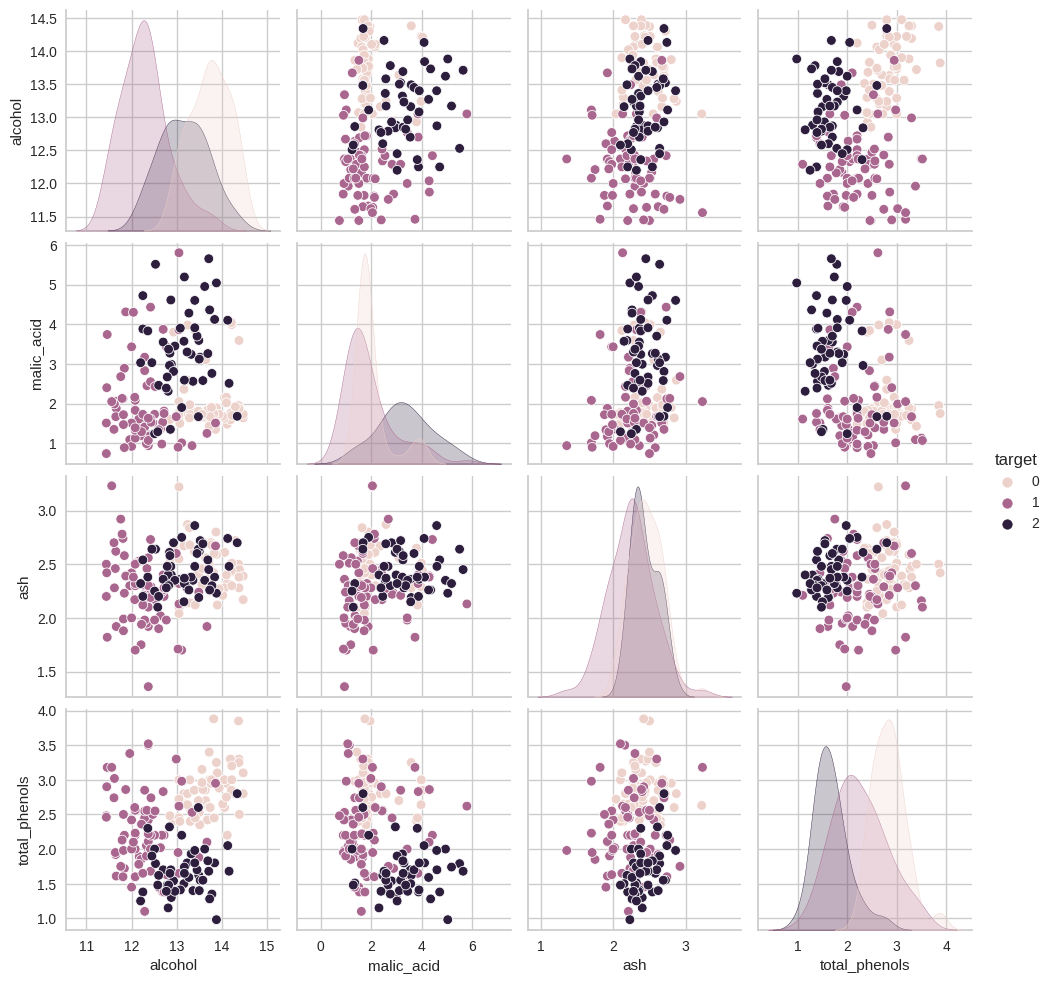

In [12]:
selected_features = ['alcohol', 'malic_acid', 'ash', 'total_phenols', 'target']
sns.pairplot(wine_df[selected_features], hue='target')
plt.show()

#3. Modify 🛠️
In this step, you'd typically handle missing data, outliers, or perform feature engineering. However, the Wine dataset is relatively clean. If you were to modify the dataset, this is where you'd do it.

Data in its raw form is rarely ready for modeling. The modify phase involves cleaning the data (handling missing values, outliers), transforming variables (scaling, encoding), and possibly deriving new features that can enhance the modeling process.

In [4]:
# Using 1st and 99th percentiles as thresholds
lower = wine_df['alcohol'].quantile(0.01)
upper = wine_df['alcohol'].quantile(0.99)

wine_df['alcohol'] = wine_df['alcohol'].apply(lambda x: lower if x < lower else upper if x > upper else x)


#4. Model 🤖
Using PyCaret, set up the environment and choose the best model.

With the prepared data, we proceed to the heart of the data mining process: modeling. This involves selecting the appropriate algorithm(s) for the task, training the model, and tuning it for optimal performance. Depending on the problem, this could involve classification, regression, clustering, or other types of algorithms.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df.drop('target', axis=1))
wine_df_scaled = pd.DataFrame(scaled_features, columns=wine_df.columns[:-1])
wine_df_scaled['target'] = wine_df['target']


In [7]:
from pycaret.classification import *

# Initialize the PyCaret environment
clf1 = setup(wine_df, target = 'target', session_id=123)

# Compare models to select the best one
best_model = compare_models()


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(178, 14)"
4,Transformed data shape,"(178, 14)"
5,Transformed train set shape,"(124, 14)"
6,Transformed test set shape,"(54, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3110
lda,Linear Discriminant Analysis,0.9917,1.0000,0.9917,0.9933,0.9917,0.9874,0.9883,0.0510
qda,Quadratic Discriminant Analysis,0.9846,1.0000,0.9846,0.9872,0.9843,0.9765,0.9781,0.0330
lightgbm,Light Gradient Boosting Machine,0.9846,0.9981,0.9846,0.9874,0.9845,0.9767,0.9783,0.3260
nb,Naive Bayes,0.9840,1.0000,0.9840,0.9873,0.9839,0.9758,0.9775,0.0310
rf,Random Forest Classifier,0.9840,0.9990,0.9840,0.9876,0.9841,0.9760,0.9777,0.2050
catboost,CatBoost Classifier,0.9840,0.9981,0.9840,0.9876,0.9841,0.9760,0.9777,4.0840
ridge,Ridge Classifier,0.9833,0.0000,0.9833,0.9868,0.9830,0.9745,0.9764,0.0310
xgboost,Extreme Gradient Boosting,0.9609,0.9947,0.9609,0.9679,0.9596,0.9405,0.9441,0.1380
lr,Logistic Regression,0.9429,0.9960,0.9429,0.9556,0.9422,0.9137,0.9205,1.3120


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

#5. Assess 📝
Evaluate the performance of the chosen model.

Finally, the performance of the model(s) is evaluated. Various metrics are used to judge the model's accuracy, reliability, and validity. It's also crucial to interpret the model in the context of the problem domain, ensuring the results are actionable and understandable.

In [8]:
# Detailed evaluation
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

This provides an interface to assess the model's performance using various metrics and plots.

#Retrieving Model Metrics:
To get the raw metrics values, you can use the get_metrics function:

In [9]:
# Get metrics values
metrics = get_metrics()
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value}")


Name: ID
acc           Accuracy
auc                AUC
recall          Recall
precision    Precision
f1                  F1
kappa            Kappa
mcc                MCC
Name: Name, dtype: object
Display Name: ID
acc          Accuracy
auc               AUC
recall         Recall
precision       Prec.
f1                 F1
kappa           Kappa
mcc               MCC
Name: Display Name, dtype: object
Score Function: ID
acc                <function accuracy_score at 0x7f351e6a8700>
auc          <pycaret.internal.metrics.BinaryMulticlassScor...
recall       <pycaret.internal.metrics.BinaryMulticlassScor...
precision    <pycaret.internal.metrics.BinaryMulticlassScor...
f1           <pycaret.internal.metrics.BinaryMulticlassScor...
kappa           <function cohen_kappa_score at 0x7f351e6a8820>
mcc             <function matthews_corrcoef at 0x7f351e6a8940>
Name: Score Function, dtype: object
Scorer: ID
acc                                                   accuracy
auc          make_scorer(roc_

#Saving the Model:
Once you've assessed the performance of the model, you can save

In [10]:
# Finalize the model (train on the complete dataset)
final_model = finalize_model(best_model)

# Save model to disk
save_model(final_model, 'SEMMA_pycaret_project')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['alcohol', 'malic_acid', 'ash',
                                              'alcalinity_of_ash', 'magnesium',
                                              'total_phenols', 'flavanoids',
                                              'nonflavanoid_phenols',
                                              'proanthocyanins',
                                              'color_intensity', 'hue',
                                              'od280/od315_of_diluted_wines',
                                              'proline'],
                                     transformer=SimpleImputer(add_indicator=False,...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max

#Conclusion 🎉
By applying the SEMMA methodology, we've taken a structured approach to understanding, preparing, modeling, and evaluating the Wine dataset. Using PyCaret in Google Colab has streamlined the process, allowing for efficient model selection and evaluation.